In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import custom_dark

In [2]:
data = pd.read_csv('data/slot-machine-data.txt')
data.head(10)

,bet,win,result
0,1.0,0.0,-1.0
1,1.0,0.0,-1.0
2,1.0,0.0,-1.0
3,1.0,0.0,-1.0
4,1.0,4.2,3.2
5,1.0,3.2,2.2
6,1.0,30.0,29.0
7,1.0,0.0,-1.0
8,1.0,0.0,-1.0
9,1.0,0.0,-1.0


## Descriptives

In [3]:
-data['result'].sum()

393.79999999999995

In [4]:
print(f'Return ratio:\t\t{data.win.sum()/data.bet.sum():.2%}')
print(f'Total loss:\t\t${-data.result.sum():.2f}')
print(f'Standard deviation:\t{data.result.std():.2f}')

Return ratio:		96.06%
Total loss:		$393.80
Standard deviation:	4.31


## Split sample into 100 subsamples

In [5]:
results = np.array_split(data['result'].values, 100)
results = [np.cumsum(attempt) for attempt in results]

In [6]:
largest_win = max([attempt[-1] for attempt in results])
largest_loss = min([attempt[-1] for attempt in results])
print(f'Largest win (loss): ${largest_win:.2f} $({largest_loss:.2f})')

Largest win (loss): $168.00 $(-66.50)


## Visualize

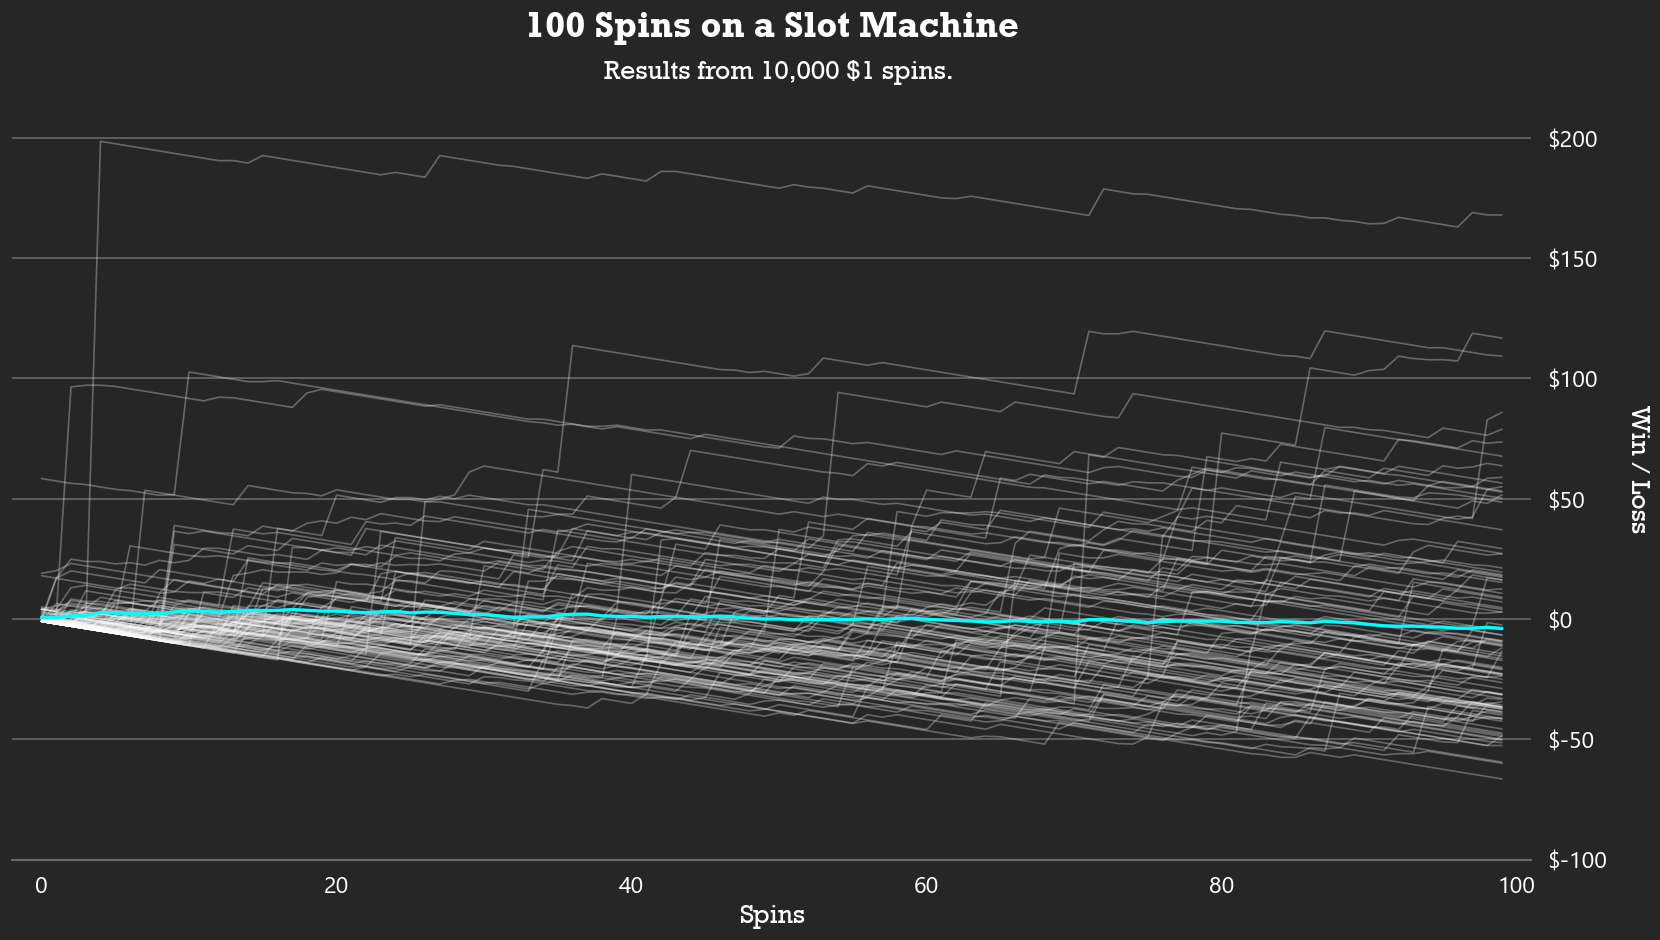

In [9]:
fig, ax = plt.subplots(figsize=(14,8))

# Plot 100 x 100 spins
for attempt in results:
    ax.plot(attempt, color='w', lw=1, alpha=.3)

# Plot mean 100 spins
ax.plot(np.mean(results, axis=0), c='cyan')

# Set limits
ax.set_ylim(ymin=-100, ymax=225)
ax.set_xlim(xmin=-2, xmax=101)

# Set titles and labels
ax.set_title('100 Spins on a Slot Machine', fontname='Rockwell')
ax.text(50, 225, 'Results from 10,000 $1 spins.', fontsize=16, fontname='Rockwell', ha='center')
ax.set_ylabel('Win / Loss', fontname='Rockwell', rotation=-90, labelpad=25)
ax.set_xlabel('Spins', fontname='Rockwell')

# Configure ticks
yticks = np.arange(-100, 225, 50)
ax.set_yticks(yticks)
ax.set_yticklabels([f'${t}' for t in yticks])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.tick_params(left=False, right=False, bottom=False)

fig.tight_layout()
fig.savefig('10000-spins.png', dpi=300, bbox_inches='tight')
plt.show()